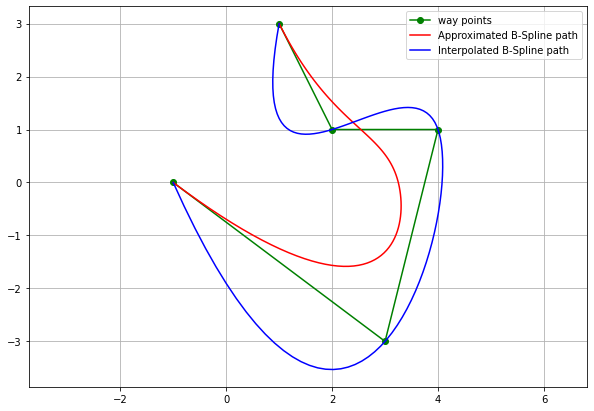

In [ ]:
"""
Path Planner with B-Spline
author: Atsushi Sakai (@Atsushi_twi)
"""

import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as scipy_interpolate


def approximate_b_spline_path(x: list, y: list, n_path_points: int,
                              degree: int = 3) -> tuple:
    """
    approximate points with a B-Spline path
    :param x: x position list of approximated points
    :param y: y position list of approximated points
    :param n_path_points: number of path points
    :param degree: (Optional) B Spline curve degree
    :return: x and y position list of the result path
    """
    t = range(len(x))
    x_tup = scipy_interpolate.splrep(t, x, k=degree)
    y_tup = scipy_interpolate.splrep(t, y, k=degree)

    x_list = list(x_tup)
    x_list[1] = x + [0.0, 0.0, 0.0, 0.0]

    y_list = list(y_tup)
    y_list[1] = y + [0.0, 0.0, 0.0, 0.0]

    ipl_t = np.linspace(0.0, len(x) - 1, n_path_points)
    rx = scipy_interpolate.splev(ipl_t, x_list)
    ry = scipy_interpolate.splev(ipl_t, y_list)

    return rx, ry


def interpolate_b_spline_path(x: list, y: list, n_path_points: int,
                              degree: int = 3) -> tuple:
    """
    interpolate points with a B-Spline path
    :param x: x positions of interpolated points
    :param y: y positions of interpolated points
    :param n_path_points: number of path points
    :param degree: B-Spline degree
    :return: x and y position list of the result path
    """
    ipl_t = np.linspace(0.0, len(x) - 1, len(x))
    spl_i_x = scipy_interpolate.make_interp_spline(ipl_t, x, k=degree)
    spl_i_y = scipy_interpolate.make_interp_spline(ipl_t, y, k=degree)

    travel = np.linspace(0.0, len(x) - 1, n_path_points)
    return spl_i_x(travel), spl_i_y(travel)


def main():
    # print(__file__ + " start!!")
    # way points
    way_point_x = [-1.0, 3.0, 4.0, 2.0, 1.0]
    way_point_y = [0.0, -3.0, 1.0, 1.0, 3.0]
    n_course_point = 100  # sampling number

    rax, ray = approximate_b_spline_path(way_point_x, way_point_y,
                                         n_course_point)
    rix, riy = interpolate_b_spline_path(way_point_x, way_point_y,
                                         n_course_point)

    # show results
    plt.figure(figsize=(10,7))
    plt.plot(way_point_x, way_point_y, '-og', label="way points")
    plt.plot(rax, ray, '-r', label="Approximated B-Spline path")
    plt.plot(rix, riy, '-b', label="Interpolated B-Spline path")
    plt.grid(True)
    plt.legend()
    plt.axis("equal")
    plt.show()


if __name__ == '__main__':
    main()